In [1]:
# !pip install bokeh

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
# from bokeh.io import output_notebook
# output_notebook()

In [3]:
def plot_df(inc_df):
    ax = inc_df.plot(x='time', y='kWh', kind='line')

    # Use a MultipleLocator tick locator
    ax.xaxis.set_major_locator(MultipleLocator(10000))  # Set tick frequency to every other x value

    # Adjust the tick label rotation
    plt.xticks(rotation=45)  # Rotate the tick labels by 45 degrees

    # Display the plot
    plt.show()

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
  
def plot_timeseries(axes, x, y, labels):
    # Create a dictionary that maps each unique label to a specific color
    label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
    # Get a list of unique labels in the 'labels' column
    unique_labels = np.unique(labels)
    # Plot each data point separately with the appropriate color
    for label in unique_labels:
        mask = labels == label
        color = label_colors[label]
        axes.plot(x[mask], y[mask], color=color, label=label)
    # Set the x-axis label
    axes.set_xlabel('X Label')
    # Set the y-axis label
    axes.set_ylabel('Y Label')
    # Set the legend
    axes.legend()



In [4]:
df = pd.read_csv('../data/train_data.csv')

In [5]:
df.head()

,time,Measure,kWh,label
0,2022-01-03 00:00:00,Mech_Svc_AHU,8.00,unclassified
1,2022-01-03 00:00:00,FB3 - Main 3L,38.45,unclassified
2,2022-01-03 00:00:00,BS3 - Main 3L,60.50,unclassified
3,2022-01-03 00:00:00,BS2 - Main 2L,13.00,unclassified
4,2022-01-03 00:00:00,Sub - Feeder F10,164.25,unclassified


In [6]:
fac_parts = df['Measure'].unique()
fac_parts

array(['Mech_Svc_AHU', 'FB3 - Main 3L', 'BS3 - Main 3L', 'BS2 - Main 2L',
       'Sub - Feeder F10', 'BS2 - Main 2R', 'BS4 - Main 4L',
       'AB1 - Main 1L', 'Sub - Feeder F01', 'BS3 - Main 3R',
       'BS1 - Main 1L', 'AB3 - Main 3R', 'AB2 - Main 2R',
       'Sub - Feeder F08', 'BS4 - Main 4R', 'MSB1 - Main 1L', 'Paint_AHU',
       'Sub - Feeder F03', 'Sub - Feeder F02', 'Sub - Feeder F04',
       'AB3 - Main 3L', 'FB1 - Main 1L', 'Sub - Main M2'], dtype=object)

In [7]:
dfs = []
for val in fac_parts:
    dfs.append(df.loc[df['Measure'] == val])

In [8]:
# get an overview of the df sizes
for cur_df in dfs:
    print(cur_df.shape)

(31620, 4)
(31794, 4)
(22617, 4)
(35522, 4)
(32506, 4)
(33870, 4)
(35015, 4)
(34135, 4)
(35685, 4)
(22454, 4)
(22488, 4)
(34988, 4)
(35029, 4)
(35751, 4)
(35621, 4)
(32337, 4)
(33846, 4)
(34489, 4)
(36677, 4)
(33931, 4)
(26685, 4)
(33589, 4)
(37207, 4)


In [9]:
# filter for actually labeled factory parts
filtered_dfs = []

for cur_df in dfs:
    if len(cur_df['label'].unique()) > 1:
        filtered_dfs.append(cur_df)

### Analyzing one labeled df

In [10]:
example_df = filtered_dfs[0].copy()

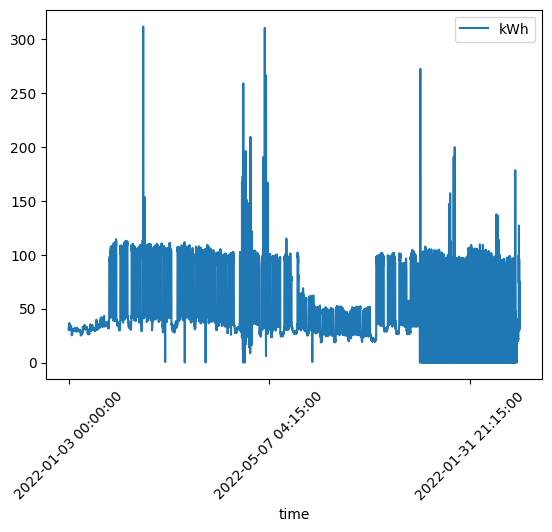

In [11]:
plot_df(example_df)

In [12]:
print(example_df['label'].value_counts())
print(example_df.describe())
print(example_df.info())
print(example_df.isna().sum())

unclassified      7903
Production        5689
Non-production    5233
Power-down        1932
Power-up          1731
Name: label, dtype: int64
                kWh
count  22488.000000
mean      56.446988
std       35.597325
min        0.000000
25%       30.148958
50%       45.500000
75%       96.040312
max      311.750000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22488 entries, 10 to 741402
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     22488 non-null  object 
 1   Measure  22488 non-null  object 
 2   kWh      22488 non-null  float64
 3   label    22488 non-null  object 
dtypes: float64(1), object(3)
memory usage: 878.4+ KB
None
time       0
Measure    0
kWh        0
label      0
dtype: int64


In [13]:
list(example_df.head())

['time', 'Measure', 'kWh', 'label']

In [14]:
example_df['time'] = pd.to_datetime(example_df['time'])

In [15]:
example_df = example_df.set_index('time')

In [16]:
example_df.head(100)

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,BS1 - Main 1L,31.7500,Non-production
2022-01-03 00:15:00,BS1 - Main 1L,31.6250,Non-production
2022-01-03 00:30:00,BS1 - Main 1L,31.5000,Non-production
2022-01-03 00:45:00,BS1 - Main 1L,31.3750,Non-production
2022-01-03 01:00:00,BS1 - Main 1L,31.2500,Non-production
...,...,...,...
2022-01-03 23:45:00,BS1 - Main 1L,31.1875,Non-production
2022-01-04 00:00:00,BS1 - Main 1L,30.7500,Non-production
2022-01-04 00:15:00,BS1 - Main 1L,30.5625,Non-production


In [17]:
example_df = example_df.resample('1H').first()

In [18]:
example_df.head(100)

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,BS1 - Main 1L,31.75,Non-production
2022-01-03 01:00:00,BS1 - Main 1L,31.25,Non-production
2022-01-03 02:00:00,BS1 - Main 1L,30.00,Non-production
2022-01-03 03:00:00,BS1 - Main 1L,31.25,Non-production
2022-01-03 04:00:00,BS1 - Main 1L,34.00,Non-production
...,...,...,...
2022-01-06 23:00:00,BS1 - Main 1L,30.00,Non-production
2022-01-07 00:00:00,BS1 - Main 1L,29.75,Non-production
2022-01-07 01:00:00,BS1 - Main 1L,30.25,Non-production


In [19]:
# drop outliers
threshold_up = example_df['kWh'].quantile(0.95)
threshold_down = example_df['kWh'].quantile(0.05)
example_df = example_df[(example_df['kWh'] < threshold_up) & (example_df['kWh'] > threshold_down)]

In [20]:
# source=ColumnDataSource(example_df)
output_file("plot_after.html")

In [21]:
p=figure(title='kWh over time', x_axis_label='Time', y_axis_label='kWh')
p.line(example_df.index, example_df['kWh'], line_width=2)
show(p)

TypeError: plot_timeseries() takes 4 positional arguments but 6 were given

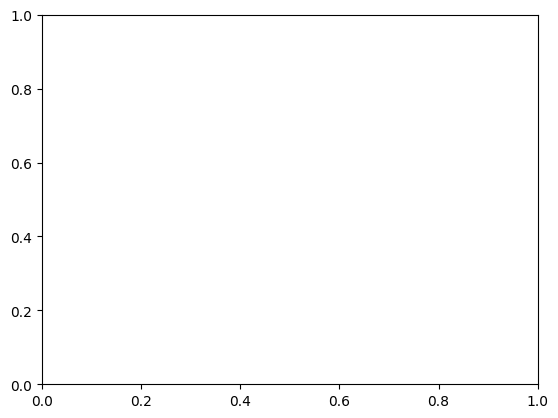

In [22]:
fig, ax = plt.subplots()
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, example_df.index, example_df["kWh"], 'blue', "Time", "Energy in (kWh)")
plt.xticks(rotation=45)
plt.show()

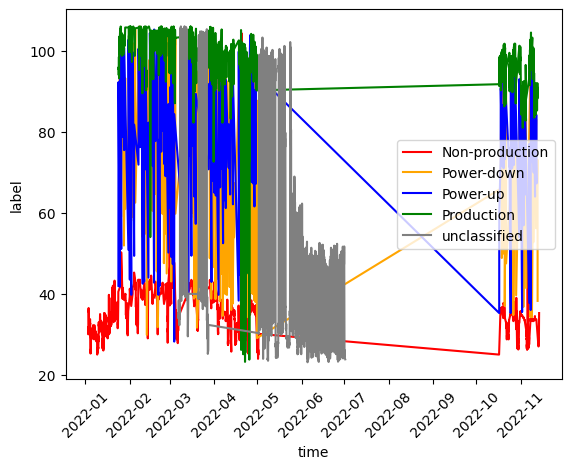

In [23]:
fig, ax = plt.subplots()
label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
grouped = example_df.groupby('label')
# Loop over each group, plot the data with the appropriate color, and set the label
for label, group in grouped:
    color = label_colors[label]
    ax.plot(group.index, group['kWh'], color=color, label=label)
# Set the x-axis label
ax.set_xlabel(example_df.index.name)
# Set the y-axis label
ax.set_ylabel('label')
plt.xticks(rotation=45)
# Set the legend
ax.legend()
plt.show()

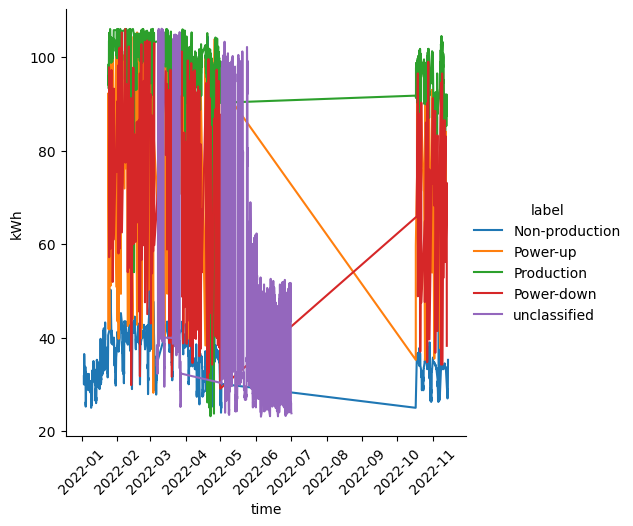

In [24]:
g = sns.relplot(x=example_df.index, y='kWh', data=example_df, kind='line', hue='label')
plt.xticks(rotation=45)
plt.show()

In [32]:
example_df.head()

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,BS1 - Main 1L,31.75,Non-production
2022-01-03 01:00:00,BS1 - Main 1L,31.25,Non-production
2022-01-03 02:00:00,BS1 - Main 1L,30.00,Non-production
2022-01-03 03:00:00,BS1 - Main 1L,31.25,Non-production
2022-01-03 04:00:00,BS1 - Main 1L,34.00,Non-production


In [34]:
example_df['Measure'].unique()

array(['BS1 - Main 1L'], dtype=object)

In [35]:
example_df.to_csv('BS1_-_Main_1L.csv')

# Solution

In [25]:
holdout = pd.read_csv('../data/holdout.csv')

In [26]:
holdout.head(100)

,time,Measure,kWh,label
0,2020-07-27 00:00:00,Sub - Feeder F08,481.5000,Non-production
1,2020-07-27 00:15:00,Sub - Feeder F08,481.3750,Non-production
2,2020-07-27 00:30:00,Sub - Feeder F08,481.2500,Non-production
3,2020-07-27 00:45:00,Sub - Feeder F08,481.1250,Non-production
4,2020-07-27 01:00:00,Sub - Feeder F08,481.0000,Non-production
...,...,...,...,...
95,2020-07-28 10:00:00,Sub - Feeder F08,748.0000,Production
96,2020-07-28 10:15:00,Sub - Feeder F08,774.8125,Production
97,2020-07-28 10:30:00,Sub - Feeder F08,801.6250,Production
98,2020-07-28 10:45:00,Sub - Feeder F08,828.4375,Production


In [27]:
holdout['label'].unique()

array(['Non-production', 'Production', 'Power-up', 'Power-down'],
      dtype=object)

In [28]:
holdout['time'] = pd.to_datetime(holdout['time'])
holdout = holdout.set_index('time')
holdout = holdout.resample('1H').first()

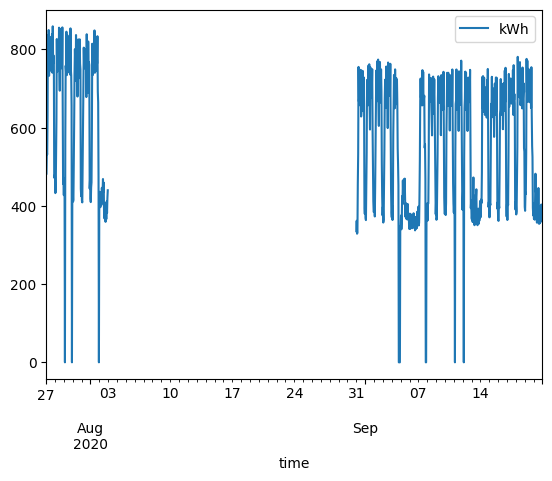

In [29]:
holdout.plot.line(y='kWh')
plt.show()

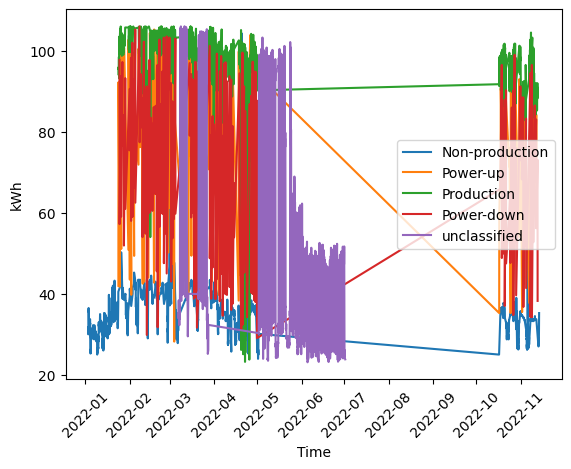

In [30]:
unique_labels = example_df['label'].unique()

# Create a plot with a different color for each label
fig, ax = plt.subplots()
for label in unique_labels:
    # Get the subset of the dataframe for this label
    subset = example_df[example_df['label'] == label]
    # Plot the data for this label with a different color
    ax.plot(subset.index, subset['kWh'], label=label)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('kWh')
plt.xticks(rotation=45)
plt.show()

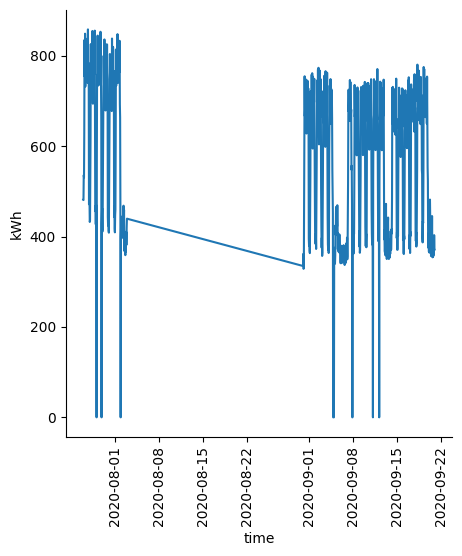

In [31]:
# x=holdout.index
g = sns.relplot(x='time', y='kWh', data=holdout, kind='line')
plt.xticks(rotation=90)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22c1b282-2107-48fd-9ae8-653063272eaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>